# Lending Club Case Study

### Objective of the case study is to identify risky loan applicants. Risky loan applicants of are the borrowers who refuse to pay. They are labelled as Charged-Off and are the defaulters. 
### Aim of the study is to indentify the factors which may cause the loan applicants to default.

### Import the loan dataset

In [156]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 10000)


# load dataset
loan_df = pd.read_csv("loan.csv", low_memory=False);

### Inspect dataset

In [157]:

print(loan_df.info(verbose=1));
print(loan_df.head());

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [158]:
# Get the rows & Columns
loan_df.shape

(39717, 111)

In [159]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

### Find the percentage of NA values in each column


In [160]:
missing_vals = (loan_df.isna().mean()*100).sort_values(ascending=False);
print(missing_vals);

num_il_tl                         100.000000
num_bc_sats                       100.000000
num_bc_tl                         100.000000
num_actv_bc_tl                    100.000000
num_accts_ever_120_pd             100.000000
mths_since_recent_revol_delinq    100.000000
num_actv_rev_tl                   100.000000
mths_since_recent_inq             100.000000
num_tl_90g_dpd_24m                100.000000
num_tl_30dpd                      100.000000
num_tl_120dpd_2m                  100.000000
num_sats                          100.000000
num_rev_tl_bal_gt_0               100.000000
num_rev_accts                     100.000000
pct_tl_nvr_dlq                    100.000000
mo_sin_old_il_acct                100.000000
mo_sin_old_rev_tl_op              100.000000
mo_sin_rcnt_rev_tl_op             100.000000
mo_sin_rcnt_tl                    100.000000
mths_since_recent_bc              100.000000
mort_acc                          100.000000
mths_since_recent_bc_dlq          100.000000
bc_util   

### Remove columns with > 30% missing data

In [161]:
loan_df = loan_df.loc[:, missing_vals < 30]
loan_df.shape

(39717, 53)

### On a quick inspection of the CSV, it was observed that few columns had only zeroes. Checking if indeed it was the case

In [162]:
cols_with_zero_vals = loan_df.columns[loan_df.any() == False]
print(cols_with_zero_vals)

Index(['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'], dtype='object')


### Remove the columns with only zeroes and check the shape


In [163]:
loan_df.drop(cols_with_zero_vals, axis=1, inplace=True)


In [164]:
# inspect data 
print(loan_df.describe())
print(loan_df.info(verbose=1))

                 id     member_id     loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc           dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec      revol_bal     total_acc     out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  collection_recovery_fee  last_pymnt_amnt  policy_code  pub_rec_bankruptcies
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000     39717.000000  39717.000000  3.971700e+04  39717.000000  39717.000000    39717.000000  39717.000000  39717.000000   39717.000000  39717.000000  39717.000000   39717.000000  39717.000000     39717.000000     39717.000000   39717.000000        39717.000000  39717.000000             39717.000000     39717.000000      39717.0          39020.000000
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196     10397.448868    324.561922  6.896893e+04     13.315130      0.146512        0.869200      9.294408      0.055065

### For analysis, we need to analyse the data points applicable during loan application. Which are below:
<ol>
    <li>loan_amnt amount listed by the burrower. A very high amount may 'risky' </li>
    <li>funded_amnt</li>
    <li>funded_amnt_inv: Amount committed to a loan may be a driving factor</li>
    <li>term: No of payments on the loan</li>
    <li>int_rate: loan interest</li>
    <li>installment: the monthly payment</li>
    <li>grade</li>
    <li>sub_grade: assigning a quality score to a loan based on a borrower's credit history</li>
    <li>emp_length: Employment length in years.</li>
    <li>home_ownership: applicant's home ownership status</li>
    <li>annual_inc: annual income provided by the borrower</li>
    <li>verification_status: if income verified by LC</li>
    <li>loan_status: loan's current status</li>
    <li>pymnt_plan: loan's payment plan</li>
    <li>purpose: category provided by the borrower for the loan request. </li>
    <li>title: The loan title provided by the borrower</li>
    <li>dti: monthly debt payments to  monthly income ratio</li>
    <li>earliest_cr_line: when customer's first credit line was opened</li>
    <li>inq_last_6mths: inquiries in last six months</li>
    <li>open_acc: no of open credit lines</li>
    <li>pub_rec: no of public derogatory records</li>
    <li>total_acc:  total number of credit lines currently in the borrower's credit file</li>
    <li>pub_rec_bankruptcies: Number of public record bankruptcies</li>
    <li>issue_d: Loan issue date</li>
<ol>

In [165]:
cols_to_keep = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade' , 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'title', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'total_acc', 'pub_rec_bankruptcies', 'issue_d']
loan_df = loan_df.loc[:, cols_to_keep]
print(loan_df.shape)

(39717, 24)


### NA values after removing columns with > 30% missing values in clean dataset

In [166]:
missing_vals = (loan_df.isna().mean()*100).sort_values(ascending=False);
print(missing_vals);

emp_length              2.706650
pub_rec_bankruptcies    1.754916
title                   0.027696
loan_amnt               0.000000
int_rate                0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
pymnt_plan              0.000000
home_ownership          0.000000
purpose                 0.000000
dti                     0.000000
inq_last_6mths          0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
total_acc               0.000000
issue_d                 0.000000
dtype: float64


### Handle missing values

In [167]:
# in emp_length column
loan_df['emp_length'] = loan_df['emp_length'].fillna(loan_df['emp_length'].mode()[0])

# pub_rec_bankruptcies
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].median())

# title
loan_df['title'] = loan_df['title'].fillna(loan_df['title'].mode()[0])


### Select columns with datatype = object and inspect their sample data

In [168]:
obj_cols = loan_df.select_dtypes(include=["object"]).columns;

for ocol in obj_cols:
    print('---------------------------------------------------------------------------------------------------------\n');
    print('sample data in column ', ocol , '\n');
    print(loan_df[ocol].head(n=10));



---------------------------------------------------------------------------------------------------------

sample data in column  term 

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
5     36 months
6     60 months
7     36 months
8     60 months
9     60 months
Name: term, dtype: object
---------------------------------------------------------------------------------------------------------

sample data in column  int_rate 

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
5     7.90%
6    15.96%
7    18.64%
8    21.28%
9    12.69%
Name: int_rate, dtype: object
---------------------------------------------------------------------------------------------------------

sample data in column  grade 

0    B
1    C
2    C
3    C
4    B
5    A
6    C
7    E
8    F
9    B
Name: grade, dtype: object
---------------------------------------------------------------------------------------------------------

sample data in column  sub_grade 

0    B2
1

### Convert datatypes

In [169]:
import re
# term column
# loan_df['term'] = loan_df['term'].apply(lambda x : re.findall(r'\d+', x)[0]).astype('int64');

In [170]:
# int_rate Column
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x : str(x).replace('%', '')).astype('float64');

In [171]:
# emp_length column
# Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
# Needs data correction
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x : str(x).replace('< 1 year', '0').replace('10+ years', '10').replace('years', '').replace('year', '').strip()).astype('int64')
print(loan_df['emp_length'].value_counts());


emp_length
10    9954
0     4583
2     4388
3     4095
4     3436
5     3282
1     3240
6     2229
7     1773
8     1479
9     1258
Name: count, dtype: int64


In [172]:
import datetime
loan_df['issue_d_month'] = loan_df['issue_d'].apply(lambda x : datetime.datetime.strptime(str(x).replace('-', ' 20'),'%b %Y').strftime('%m')).astype('int64')
loan_df['issue_d_year'] = loan_df['issue_d'].apply(lambda x : datetime.datetime.strptime(str(x).replace('-', ' 20'),'%b %Y').strftime('%Y')).astype('int64')

### Check the missing values again

In [173]:
print(loan_df.isna().mean() * 100);

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
loan_status             0.0
pymnt_plan              0.0
purpose                 0.0
title                   0.0
dti                     0.0
earliest_cr_line        0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
total_acc               0.0
pub_rec_bankruptcies    0.0
issue_d                 0.0
issue_d_month           0.0
issue_d_year            0.0
dtype: float64


### Check the datatypes again

In [174]:
print(loan_df.dtypes)

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
pymnt_plan               object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
total_acc                 int64
pub_rec_bankruptcies    float64
issue_d                  object
issue_d_month             int64
issue_d_year              int64
dtype: object


In [175]:
print(loan_df.info(verbose=1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  float64
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_length            39717 non-null  int64  
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  pymnt_plan            39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

### Finding outliers

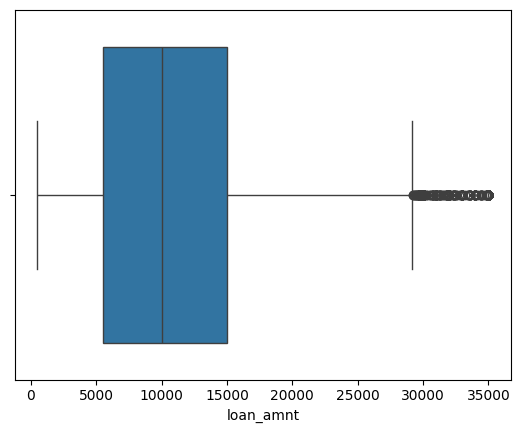

In [176]:
sns.boxplot(loan_df, x = 'loan_amnt')
plt.show()

In [177]:
print(loan_df['loan_amnt'].describe())

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


### Not a huge value jump from 75th percentile to the max value. keeping as-is

In [178]:
loan_amnt_quantiles = loan_df['loan_amnt'].quantile([0.90, 0.97, 1])
print(loan_amnt_quantiles)

0.90    22000.0
0.97    30000.0
1.00    35000.0
Name: loan_amnt, dtype: float64


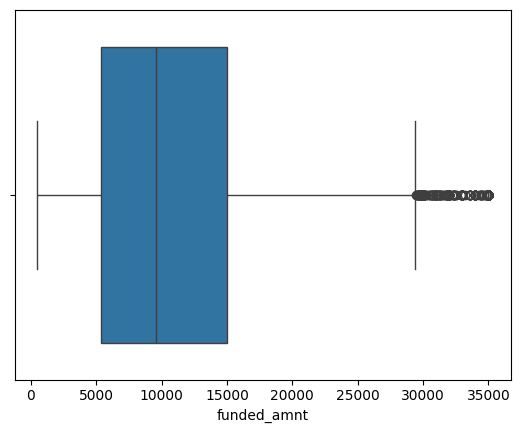

In [179]:
#funded_amnt
sns.boxplot(loan_df, x='funded_amnt')
plt.show()

In [180]:
print(loan_df['funded_amnt'].describe())

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


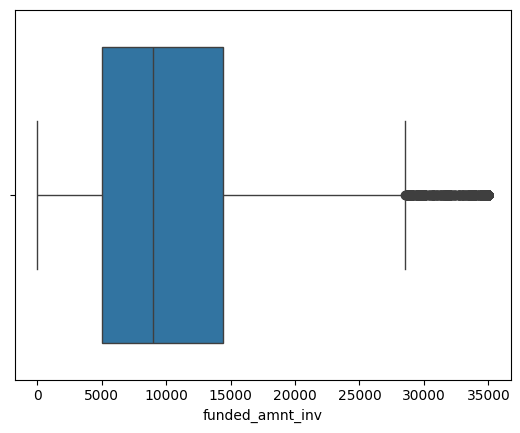

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


In [181]:
sns.boxplot(loan_df, x='funded_amnt_inv')
plt.show()
print(loan_df['funded_amnt_inv'].describe())

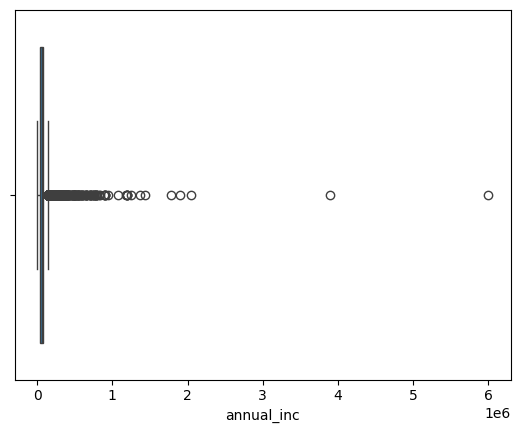

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [182]:
sns.boxplot(loan_df, x='annual_inc')
plt.show()
print(loan_df['annual_inc'].describe())

### Annual income distribution is not continuous in nature beyond 1000000 mark. Needs further analysis

In [183]:
annual_inc_quantiles = loan_df['annual_inc'].quantile([0.50, 0.75, 0.90, 0.95, 0.98, 0.99 , 1])
print(annual_inc_quantiles)

0.50      59000.00
0.75      82300.00
0.90     116000.00
0.95     142000.00
0.98     187000.00
0.99     234999.36
1.00    6000000.00
Name: annual_inc, dtype: float64


### Huge jump after the 99th Percentile. So keeping data till 99th percentile only

In [184]:
loan_df = loan_df[loan_df['annual_inc'] <= loan_df['annual_inc'].quantile(0.99)]


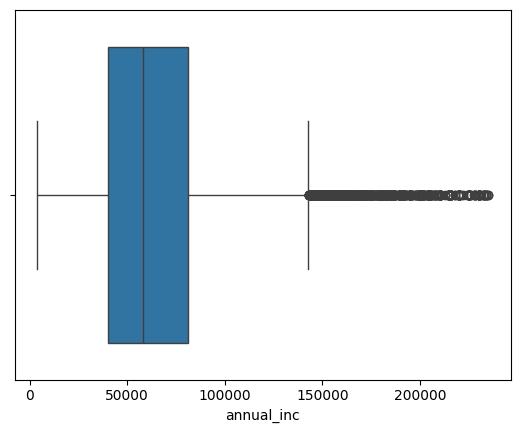

In [185]:
sns.boxplot(loan_df, x='annual_inc')
plt.show()

### Save the cleaned dataset to csv file


In [186]:
loan_df.to_csv("loan_cleaned_dataset.csv", index=False)

## Univariate Analysis


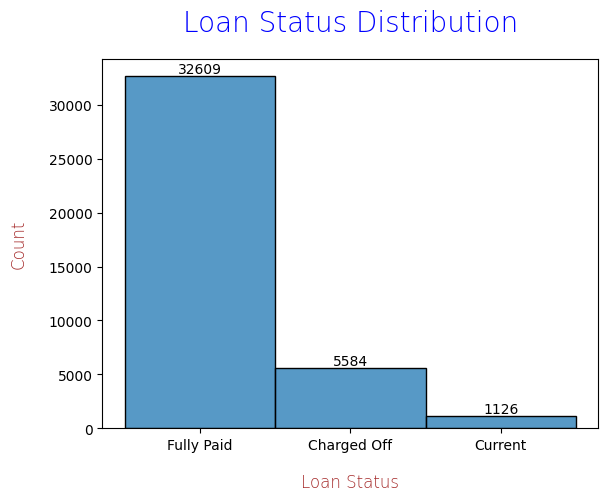

In [187]:
# Create a histogram for 'loan_status' for loan_status
ax = sns.histplot(loan_df, x='loan_status',discrete=True)
for container in ax.containers:
    ax.bar_label(container)

# Add title and labels
plt.title('Loan Status Distribution', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'}, pad=20)
plt.xlabel('Loan Status',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.show()

### Out of the 3 categrories in the above graph, we are only considering the charged-off cases for univariate analysis to determine which variable may cause a loan to default

In [188]:
charged_off = loan_df[loan_df['loan_status'] == 'Charged Off' ]
# Calculate total number of records
total = len(charged_off)

### The analysis successfully identifies 10 key variables that serve as strong indicators of default, which can be critical for risk assessment and management strategies.

1. Home Ownership Analysis
2. Loan Tenure Analysis
3. Loan Category Analysis
4. Annual Income Analysis
5. Analysis Based on Loan Amount
6. Debt to Income Ratio Analysis
7. Interest Rate Analysis
8. Employee Experience Analysis
9. Analysis of Loan Grades
10. Analysis of Loan Issued by Month

### 1. Home Ownership Analysis

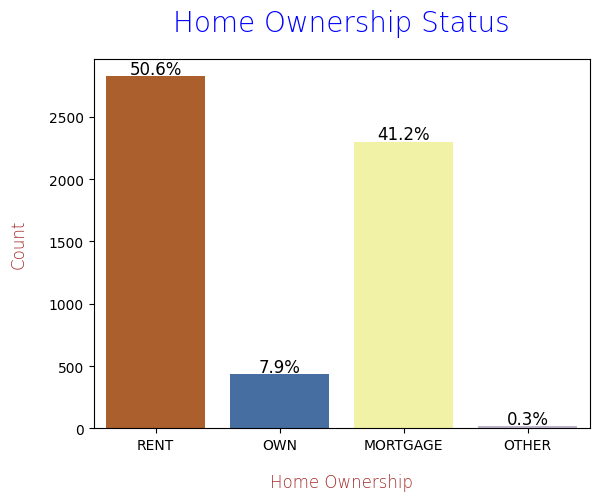

In [189]:
# Create a countplot for the 'home_ownership' column

ax=sns.countplot(x ='home_ownership', data = charged_off , palette="Accent_r")

# Add title and labels
plt.title('Home Ownership Status', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Home Ownership',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)

# Calculate percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### 2. Loan Tenure Analysis

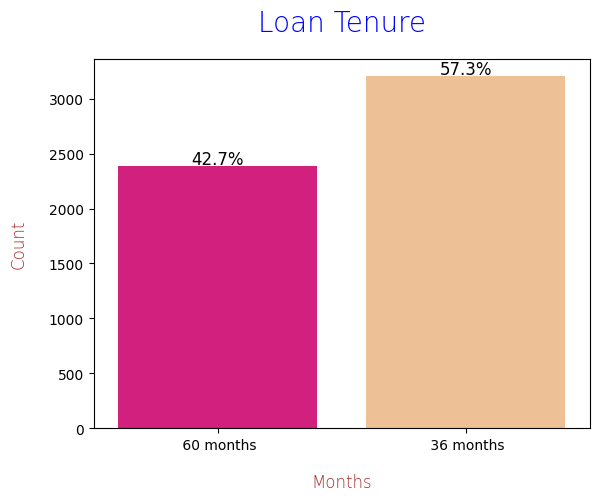

In [190]:
# Create a countplot for the 'term' column
ax=sns.countplot(x ='term', data = charged_off, palette = "Accent_r")

# Add title and labels
plt.title('Loan Tenure', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Months',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)

# Calculate percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

### 3. Loan Category Analysis

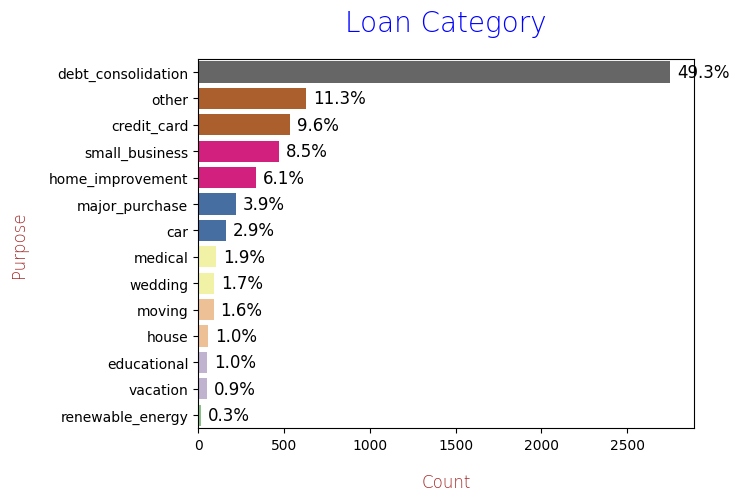

In [191]:
# Create a horizontal countplot for 'purpose' in descending order
order = charged_off['purpose'].value_counts().index
ax=sns.countplot(y ='purpose', data = charged_off,order=order, palette="Accent_r")

# Add title and labels
plt.title('Loan Category', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Purpose',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)

# Calculate percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)  
    ax.annotate(percentage, 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=12, color='black', xytext=(5, 0),
                textcoords='offset points')
plt.show()

### 4. Annual Income Analysis

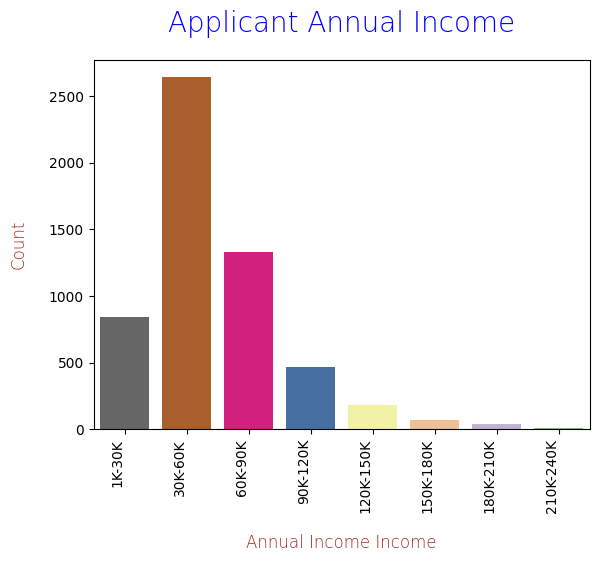

In [192]:
# Create a histogram for 'annual_inc' with segmented income groups
charged_off['inc_bins'] = pd.cut(charged_off['annual_inc'], 
                                 bins=[1000, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 240000],
                                   labels =['1K-30K','30K-60K','60K-90K','90K-120K','120K-150K', '150K-180K', '180K-210K', '210K-240K'],
                                   precision=0)



ax = sns.countplot(x='inc_bins', data=charged_off, palette="Accent_r")


# Add title and labels
plt.title('Applicant Annual Income', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Annual Income Income',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.xticks(rotation=90, ha='right')


plt.show()



### 5. Analysis Based on Loan Amount

In [199]:
print(charged_off['loan_amnt'].describe())

count     5584.000000
mean     12042.814291
std       8041.184317
min        900.000000
25%       5600.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


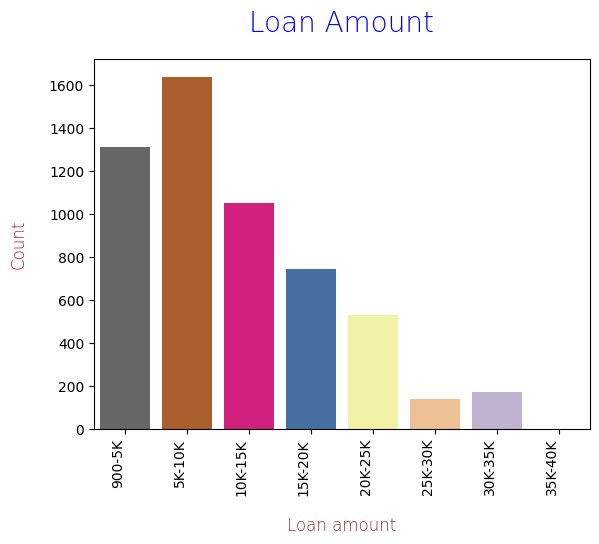

In [203]:
# Create a countplot with segmented 'loan_amnt'
charged_off['loan_amnt_bins'] = pd.cut(charged_off['loan_amnt'], 
                                 bins=[900, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],
                                   labels =['900-5K','5K-10K','10K-15K','15K-20K','20K-25K', '25K-30K', '30K-35K', '35K-40K'],
                                   precision=0)



ax = sns.countplot(x='loan_amnt_bins', data=charged_off, palette="Accent_r")

# Add title and labels
plt.title('Loan Amount', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Loan amount',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.xticks(rotation=90, ha='right')
plt.show()

### 6. Debt to Income Ratio Analysis

In [204]:
print(charged_off['dti'].describe())

count    5584.000000
mean       14.044989
std         6.570481
min         0.000000
25%         9.127500
50%        14.340000
75%        19.310000
max        29.850000
Name: dti, dtype: float64


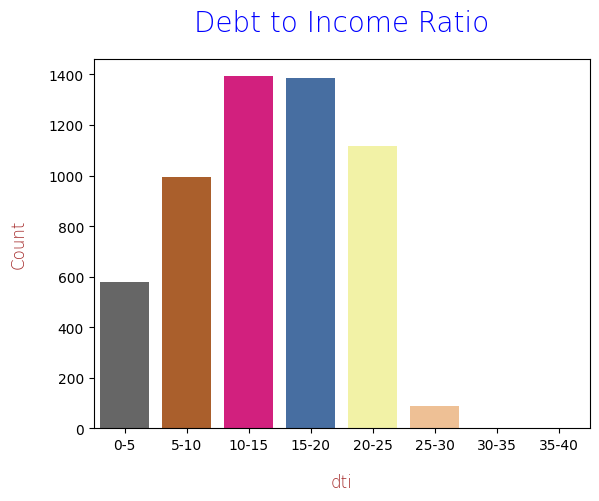

In [207]:
# Create a countplot with segmented 'dti'
charged_off['dti_bins'] = pd.cut(charged_off['dti'], 
                                 bins=[0, 5, 10, 15, 20, 25, 30, 35, 40],
                                   labels =['0-5','5-10','10-15','15-20','20-25', '25-30', '30-35', '35-40'],
                                   precision=0)
ax = sns.countplot(x='dti_bins', data=charged_off, palette="Accent_r")


# Add title and labels
plt.title('Debt to Income Ratio', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('dti',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.show()

### 7. Interest Rate Analysis

In [208]:
print(charged_off['int_rate'].describe())

count    5584.000000
mean       13.808626
std         3.648676
min         5.420000
25%        11.280000
50%        13.570000
75%        16.400000
max        24.400000
Name: int_rate, dtype: float64


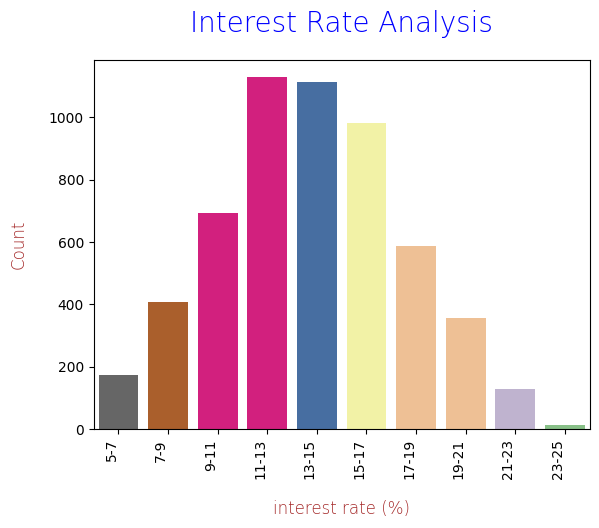

In [210]:
# Create a countplot with segmented 'int_rate' column
charged_off['int_rate_bins'] = pd.cut(charged_off['int_rate'], 
                                 bins=[5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
                                   labels =['5-7','7-9','9-11','11-13','13-15','15-17', '17-19', '19-21', '21-23', '23-25'],
                                   precision=0)
ax = sns.countplot(x='int_rate_bins', data=charged_off, palette="Accent_r")
# Add title and labels
plt.title('Interest Rate Analysis', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('interest rate (%)',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.xticks(rotation=90, ha='right')

plt.show()

### 8. Employee Experience Analysis

In [211]:
print(charged_off['emp_length'].describe())

count    5584.000000
mean        5.276683
std         3.657941
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        10.000000
Name: emp_length, dtype: float64


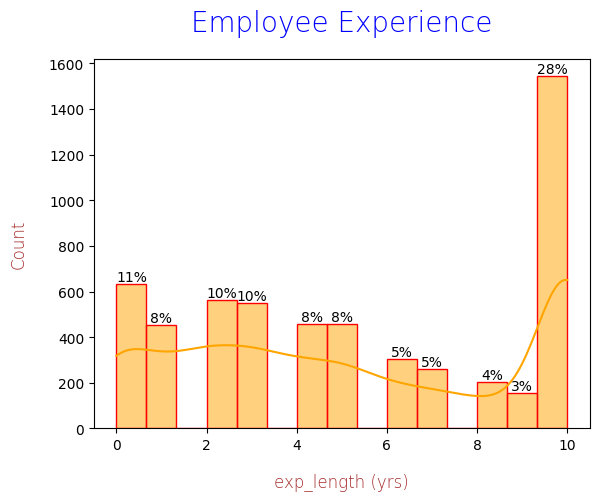

In [214]:
# Create a histogram for 'emp_length' column
hist_data=sns.histplot(charged_off, x = 'emp_length', bins=15, kde=True, color='orange', edgecolor='red')
total_count = charged_off['emp_length'].count()

# Calculate percentage
for patch in hist_data.patches:
    height = patch.get_height()
    percentage = (height / total_count) * 100
    if percentage > 0:
        hist_data.annotate(f'{percentage:.0f}%', 
                           (patch.get_x() + patch.get_width() / 2, height), 
                           ha='center', va='bottom', fontsize=10, color='black')

# Add title and labels
plt.title('Employee Experience', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('exp_length (yrs)',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.show()

### 9. Analysis of Loan Grades

grade
B    1414
C    1342
D    1112
E     704
A     601
F     312
G      99
Name: count, dtype: int64


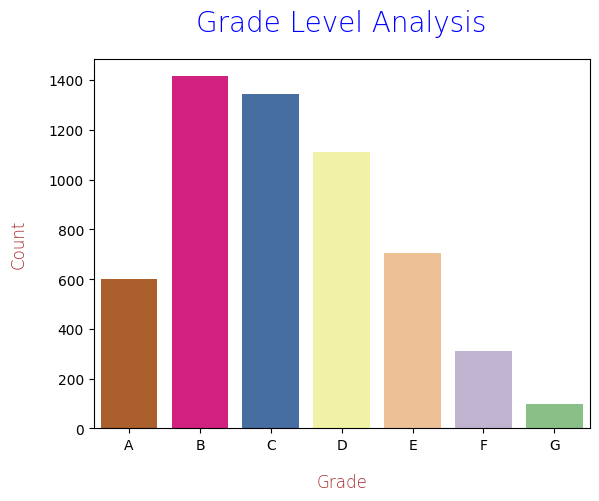

In [197]:
# Create a countplot for 'grade' column
sns.countplot(charged_off, x = 'grade', order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], palette='Accent_r')
print(charged_off['grade'].value_counts())

# Add title and labels
plt.title('Grade Level Analysis', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Grade',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.show()

### 10. Analysis of Loan Issued by Month

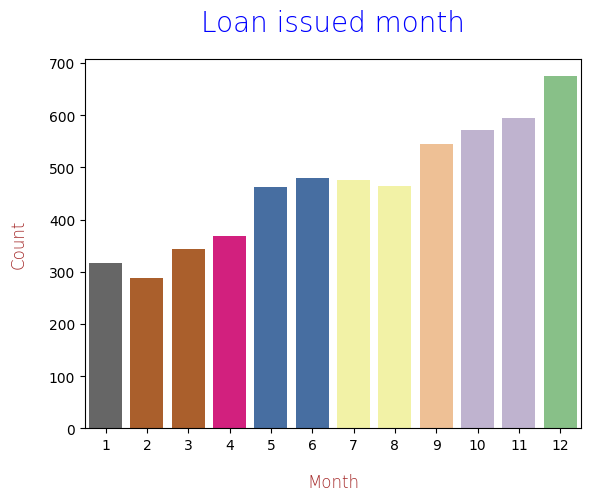

In [198]:
# Create a histogram for 'issue_d_month' column
sns.countplot(charged_off, x = 'issue_d_month', palette='Accent_r')

# Add title and labels
plt.title('Loan issued month', fontdict={'fontsize': 20, 'fontweight' : 20, 'color' : 'Blue'},pad=20)
plt.xlabel('Month',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.ylabel('Count',fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'},labelpad=15)
plt.show()